In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("b.csv")
df2 = pd.read_csv("a.csv")

In [ ]:
df1.head()

,created_at_time,event,org_id,project_id,user_id
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk


In [ ]:
df2.head()

,Event,Description,Section
0,add_attendance_success,Successfully adding attendance of a person once,Labour
1,assigned_people_on_task,Assigned another person on a particular task,Task
2,attendance_list_accessed,Attendance list page opens on clicking this bu...,Labour
3,channel_message_sent,Message sent on chat feature,General
4,comment_create_success,Comment Created,General


In [ ]:
df1.info() #created_at_time seems to be object which should be timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41177 entries, 0 to 41176
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_at_time  41177 non-null  object
 1   event            41177 non-null  object
 2   org_id           41177 non-null  object
 3   project_id       41036 non-null  object
 4   user_id          41177 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Event        17 non-null     object
 1   Description  17 non-null     object
 2   Section      17 non-null     object
dtypes: object(3)
memory usage: 536.0+ bytes


In [ ]:
df1['created_at_time'] = pd.to_datetime(df1['created_at_time']) #converted to to timestamp
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41177 entries, 0 to 41176
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   created_at_time  41177 non-null  datetime64[ns]
 1   event            41177 non-null  object        
 2   org_id           41177 non-null  object        
 3   project_id       41036 non-null  object        
 4   user_id          41177 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.6+ MB


In [ ]:
df1.shape

(41177, 5)

In [ ]:
df2.shape

(17, 3)

In [ ]:
df1.isnull().sum()

#141 empty rows in project_id seems okay within 41036 rows. So i will leave it be as impact on result should be negligible.

created_at_time      0
event                0
org_id               0
project_id         141
user_id              0
dtype: int64

In [ ]:
df2.isnull().sum()

Event          0
Description    0
Section        0
dtype: int64

Text(0.5, 1.0, 'General Engagement (count of all events)')

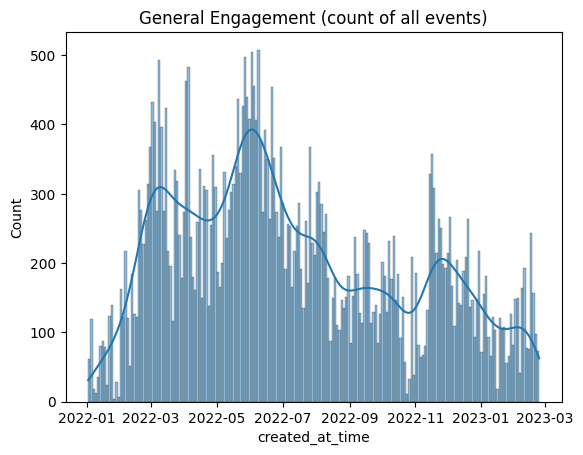

In [ ]:
sns.histplot(df1["created_at_time"], bins = 200, kde = True)
plt.title("General Engagement (count of all events)")

# General engagement seems highest near 2022-06 and seems to be dropping following that.

In [ ]:
for i in df1['event'].unique():
        print(i)


project_creation_request_success
task_log_create_success
task_creation
stock_material_updated
new_material_added
indent_create_success
generate_report_success
dashboard_view_success
add_attendance_success
material_profile_material_load
attendance_list_accessed
thread_create_success
comment_create_success
channel_message_sent
assigned_people_on_task
image_upload_success
followup_button_clicked


In [ ]:
df1.merge(df2, left_on= "event", right_on= "Event", how="left").head() #merging the two tables on event

,created_at_time,event,org_id,project_id,user_id,Event,Description,Section
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,project_creation_request_success,Successfully creating a new project,General
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,task_log_create_success,Successfully creating an update on a particula...,Task
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,task_creation,Successfully creating a task,Task
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,project_creation_request_success,Successfully creating a new project,General
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,task_log_create_success,Successfully creating an update on a particula...,Task


In [ ]:
df1['event'].value_counts()

material_profile_material_load      10114
add_attendance_success               7569
stock_material_updated               7272
task_log_create_success              5010
comment_create_success               2054
channel_message_sent                 1867
generate_report_success              1701
task_creation                        1602
new_material_added                   1243
attendance_list_accessed              837
project_creation_request_success      651
dashboard_view_success                622
assigned_people_on_task               290
indent_create_success                 158
thread_create_success                  93
image_upload_success                   70
followup_button_clicked                24
Name: event, dtype: int64

In [ ]:
x = df1.groupby(["user_id"])

In [ ]:
x.head()

,created_at_time,event,org_id,project_id,user_id
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk
...,...,...,...,...,...
40747,2022-02-26 12:43:41,task_log_create_success,ORG588585401431,PRJ445327911477,USR189569223674
40748,2022-02-26 12:44:00,task_log_create_success,ORG588585401431,PRJ445327911477,USR189569223674
41111,2022-05-23 16:25:15,generate_report_success,ORG588585401431,PRJ041922398144,USR590498758042
41175,2022-02-21 23:59:56,task_creation,ORG593668212572,PRJ436423104439,USR067850628645


In [ ]:
df1.groupby('project_id').size()

# 914 unique projects

project_id
PRJ-5stoog9uym4      1
PRJ-7b16im-6gk7     86
PRJ-imro3q3t079      1
PRJ-n6t0t8aiy6p      1
PRJ003977810032      1
                  ... 
PRJzufi80cpcnll      5
PRJzw6mx0rh1c2h     17
PRJzx1g459coeiw      1
PRJzyxei9ufiq79      1
PRJzyzuaxnta6hh    577
Length: 914, dtype: int64

In [ ]:
 df1.groupby(['project_id', 'user_id']).size()

 #1263 unique user_id's

project_id       user_id        
PRJ-5stoog9uym4  USRvu-du2eybeek      1
PRJ-7b16im-6gk7  USR395096428126      1
                 USR786463905484     82
                 USRk9za6p3gh7ms      3
PRJ-imro3q3t079  USRt61pkl29n188      1
                                   ... 
PRJzyzuaxnta6hh  USR375028109986      6
                 USR3y6b1dh43hjd     13
                 USR658789223695    505
                 USR869368024413     31
                 USR914128431436     22
Length: 1263, dtype: int64

In [ ]:
df1.groupby(['org_id']).size()

org_id
ORG-2nufoaj370k      1
ORG-7fcq2k7b4xg      3
ORG-iluuim4club     20
ORG-o3wg0wxgykk      4
ORG-t4fhiiw79ej      1
                  ... 
ORG57j4uuf5s9hu     10
ORG588165160357      1
ORG588408773028      2
ORG588585401431    467
ORG593668212572      2
Length: 386, dtype: int64

In [ ]:
x = df1[df1["event"] == "project_creation_request_success"]
print(x)


          created_at_time                             event           org_id  \
0     2022-04-20 18:24:30  project_creation_request_success  ORG-2nufoaj370k   
3     2022-04-25 23:28:23  project_creation_request_success  ORG-7fcq2k7b4xg   
11    2022-03-22 20:39:20  project_creation_request_success  ORG-iluuim4club   
27    2022-03-27 00:53:46  project_creation_request_success  ORG-o3wg0wxgykk   
28    2022-03-09 23:41:45  project_creation_request_success  ORG-t4fhiiw79ej   
...                   ...                               ...              ...   
41096 2022-08-07 19:53:46  project_creation_request_success  ORG588585401431   
41097 2022-08-10 14:10:14  project_creation_request_success  ORG588585401431   
41098 2022-08-11 09:09:29  project_creation_request_success  ORG588585401431   
41099 2022-09-08 15:52:54  project_creation_request_success  ORG588585401431   
41176 2022-02-21 23:56:51  project_creation_request_success  ORG593668212572   

            project_id          user_id

In [ ]:
x =x.drop(["event","org_id","user_id"],axis=1)

In [ ]:
x

,created_at_time,project_id
0,2022-04-20 18:24:30,PRJ4k2kct6c5854
3,2022-04-25 23:28:23,PRJfk9dy2gb6dhp
11,2022-03-22 20:39:20,PRJjial8edi2x63
27,2022-03-27 00:53:46,PRJcegaw8o7utm0
28,2022-03-09 23:41:45,PRJnv-cmydt-u3j
...,...,...
41096,2022-08-07 19:53:46,PRJ575771346611
41097,2022-08-10 14:10:14,PRJ894499041352
41098,2022-08-11 09:09:29,PRJ821015615086
41099,2022-09-08 15:52:54,PRJb3ril653vlt1


Text(0, 0.5, 'Event Count')

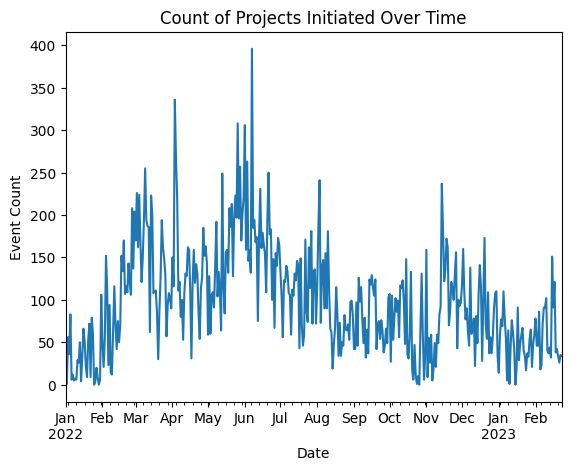

In [ ]:
df1.groupby(pd.Grouper(key='created_at_time', freq='D')).size().plot()
plt.title('Count of Projects Initiated Over Time')
plt.xlabel('Date')
plt.ylabel('Event Count')